In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

In [17]:
import pandas as pd
data = pd.read_csv('datasets/dataset.csv')
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [18]:
change_names = {
    'Text': 'texto',
    'language': 'lingua'
}

data = data.rename(columns=change_names)
data.head()

,texto,lingua
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [19]:
contagem_idiomas = data['lingua'].value_counts()

print(contagem_idiomas)


Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: lingua, dtype: int64


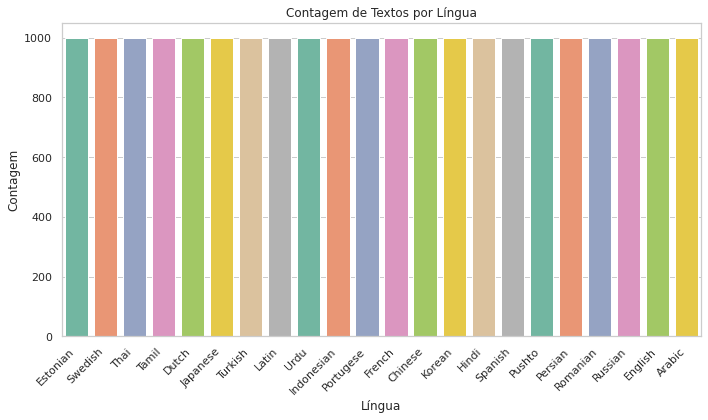

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura

# Plotagem do gráfico de contagem
sns.countplot(data=data, x="lingua", palette="Set2")  # Utiliza a paleta de cores Set2

# Adiciona rótulos aos eixos
plt.xlabel("Língua")
plt.ylabel("Contagem")
plt.title("Contagem de Textos por Língua")

# Rotaciona os rótulos no eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Exibe o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


In [21]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data['texto'], data['lingua'], test_size=0.2, random_state=42)

In [22]:
#Criar um pipeline que primeiro vetoriza o texto e depois aplica Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [23]:
# Treinar o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [24]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [25]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

"/content/dataset_sentimentos.csv", accuracy, report

('/content/dataset_sentimentos.csv',
 0.9429545454545455,
 '              precision    recall  f1-score   support\n\n      Arabic       1.00      1.00      1.00       202\n     Chinese       0.95      0.50      0.65       201\n       Dutch       0.99      0.98      0.98       230\n     English       0.69      1.00      0.82       194\n    Estonian       0.99      0.95      0.97       200\n      French       0.93      0.99      0.96       188\n       Hindi       1.00      0.99      0.99       208\n  Indonesian       1.00      0.98      0.99       213\n    Japanese       0.98      0.64      0.78       194\n      Korean       1.00      0.99      1.00       190\n       Latin       0.99      0.90      0.95       210\n     Persian       0.99      0.99      0.99       196\n   Portugese       0.99      0.97      0.98       194\n      Pushto       1.00      0.96      0.98       196\n    Romanian       0.98      0.98      0.98       197\n     Russian       0.99      0.99      0.99       213\n   

In [26]:
print(accuracy_score(y_test,y_pred))

0.9429545454545455


In [27]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Accuracy scores for each fold:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Accuracy scores for each fold: [0.94204545 0.94375    0.93693182 0.94204545 0.93977273]
Mean accuracy: 0.9409090909090908


In [28]:
# Função para prever a língua de um texto dado
def prever_lingua(texto):
    lingua_predita = model.predict([texto])[0]
    print(f"O texto '{texto}' está escrito em {lingua_predita}.")

# Exemplos de teste com a função
prever_lingua("This is a test sentence.")  # Teste em English
prever_lingua("Esta es una oración de prueba.")  # Teste em espanhol
prever_lingua("한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물이 수입...")  # Teste em Korean
prever_lingua("महाराष्ट्र  मई  को भारत का राज्य बनाया गया था। इस ...")  # Teste em Hindi
prever_lingua("tsutinalar i̇ngilizce tsuutina kanadada alberta bö...")  # Teste em Turkish
prever_lingua("Estonia on Baltimaade riik.")  # Teste em Estonian
prever_lingua("Detta är en testmening.")  # Teste em Swedish
prever_lingua("Это тестовое предложение.")  # Teste em Russian
prever_lingua("Acesta este un test de propoziție.")  # Teste em Romanian
prever_lingua("این یک جمله آزمایشی است.")  # Teste em Persian
prever_lingua("دا د یو کمپیوټر پروګرامګر جاپاني کوله او په یادښت...")  # Teste em Pushto (Afegão)
prever_lingua("這是一個測試句子。")  # Teste em Chinese
prever_lingua("C'est une phrase de test.")  # Teste em French
prever_lingua("Esta é uma frase de teste.")  # Teste em Português
prever_lingua("Ini adalah kalimat uji.")  # Teste em Indonesian
prever_lingua("یہ ایک ٹیسٹ جملہ ہے۔")  # Teste em Urdu
prever_lingua("Hoc est testis sententia.")  # Teste em Latin
prever_lingua("これはテスト文です。")  # Teste em Japanese
prever_lingua("Dit is een testzin.")  # Teste em Dutch
prever_lingua("இது ஒரு சோதனை வாக்குமூலமாகும்.")  # Teste em Tamil
prever_lingua("นี่เป็นประโยคทดสอบ")  # Teste em Thai
prever_lingua("هذه جملة اختبار.")  # Teste em Arabic



O texto 'This is a test sentence.' está escrito em English.
O texto 'Esta es una oración de prueba.' está escrito em Spanish.
O texto '한국에서 성씨가 사용되기 시작한 정확한 시기는 알 수 없으나 한자漢字 등 중국 문물이 수입...' está escrito em Korean.
O texto 'महाराष्ट्र  मई  को भारत का राज्य बनाया गया था। इस ...' está escrito em Hindi.
O texto 'tsutinalar i̇ngilizce tsuutina kanadada alberta bö...' está escrito em Turkish.
O texto 'Estonia on Baltimaade riik.' está escrito em Estonian.
O texto 'Detta är en testmening.' está escrito em Swedish.
O texto 'Это тестовое предложение.' está escrito em Russian.
O texto 'Acesta este un test de propoziție.' está escrito em Romanian.
O texto 'این یک جمله آزمایشی است.' está escrito em Persian.
O texto 'دا د یو کمپیوټر پروګرامګر جاپاني کوله او په یادښت...' está escrito em Pushto.
O texto '這是一個測試句子。' está escrito em Swedish.
O texto 'C'est une phrase de test.' está escrito em French.
O texto 'Esta é uma frase de teste.' está escrito em Portugese.
O texto 'Ini adalah kalimat uji.' está 

In [30]:
import joblib

# Nome do arquivo para salvar o modelo
filename = 'modelo_linguagem.joblib'

# Salvar o modelo utilizando joblib
joblib.dump(model, filename)

print(f"Modelo salvo como {filename}")


Modelo salvo como modelo_linguagem.joblib
